In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os, sys
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

#### 1. Read in data

In [2]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')
holidays = pd.read_csv('../data/holidays_events.csv')
oil = pd.read_csv('../data/oil.csv')
stores = pd.read_csv('../data/stores.csv')
transactions = pd.read_csv('../data/transactions.csv')

In [3]:
train.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [4]:
test.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [5]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [6]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [7]:
holidays.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [8]:
stores.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [9]:
# print the shape of all the dataframes

print(f'train data contains {train.shape[0]} rows and {train.shape[1]} columns')
print(f'test data contains {test.shape[0]} rows and {test.shape[1]} columns')
print(f'oil data contains {oil.shape[0]} rows and {oil.shape[1]} columns')
print(f'holidays data contains {holidays.shape[0]} rows and {holidays.shape[1]} columns')
print(f'stores data contains {stores.shape[0]} rows and {stores.shape[1]} columns')
print(f'transaction data contains {transactions.shape[0]} rows and {transactions.shape[1]} columns')

train data contains 3000888 rows and 6 columns
test data contains 28512 rows and 5 columns
oil data contains 1218 rows and 2 columns
holidays data contains 350 rows and 6 columns
stores data contains 54 rows and 5 columns
transaction data contains 83488 rows and 3 columns


#### 2. Merge holidays, oil, stores and transactions data with train and test data

In [10]:
def merge_df(df, holidays, oil, stores, transactions):
    """
    Merge data with other informative dataframes.

    Args:
    df: pd.DataFrame
        Main dataframe with which other dataframes should be merged.
    holidays: pd.DataFrame
        Dataframe containing holidays information.
    oil: pd.DataFrame 
        Dataframe with daily oil prices.
    stores: pd.DataFrame
        Stores metadata including city, state, type and cluster.
    transactions: pd.DataFrame
        Dataframe with transactions data.

    Returns
    df: pd.DataFrame
        Merged dataframe    

    """
    try:
        df = df.merge(holidays, on='date', how='left')
        df = df.merge(oil, on='date', how='left')
        df = df.merge(stores, on='store_nbr', how='left')
        df = df.merge(transactions, on=['date', 'store_nbr'], how='left')
        return df
    except Exception as e:
        print(f'Error occured during merging dataframes, {str(e)}')


In [11]:
train = merge_df(train, holidays, oil, stores, transactions)
test = merge_df(test, holidays, oil, stores, transactions)

In [12]:
train.head()

,id,date,store_nbr,family,sales,onpromotion,type_x,locale,locale_name,description,transferred,dcoilwtico,city,state,type_y,cluster,transactions
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
4,4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN


In [13]:
test.head()

,id,date,store_nbr,family,onpromotion,type_x,locale,locale_name,description,transferred,dcoilwtico,city,state,type_y,cluster,transactions
0,3000888,2017-08-16,1,AUTOMOTIVE,0,NaN,NaN,NaN,NaN,NaN,46.8,Quito,Pichincha,D,13,NaN
1,3000889,2017-08-16,1,BABY CARE,0,NaN,NaN,NaN,NaN,NaN,46.8,Quito,Pichincha,D,13,NaN
2,3000890,2017-08-16,1,BEAUTY,2,NaN,NaN,NaN,NaN,NaN,46.8,Quito,Pichincha,D,13,NaN
3,3000891,2017-08-16,1,BEVERAGES,20,NaN,NaN,NaN,NaN,NaN,46.8,Quito,Pichincha,D,13,NaN
4,3000892,2017-08-16,1,BOOKS,0,NaN,NaN,NaN,NaN,NaN,46.8,Quito,Pichincha,D,13,NaN


#### 3. Comprehensive summary of the data 

In [14]:
def info_table(df, num_unique_threshold = 50):
    """
    Comprehensive DataFrame Summary Table Generator
    
    For a given dataframe, this function creates a table with column names, data types, count, mean, 
    standard deviation, minimum, 25%, 50%, 75% quantiles, maximum, number of unique values, 
    unique values list, number of null values and 
    percentage of null values.

    Args:
    df: pd.DataFrame
        Input dataframe.
    num_unique_threshold: int, optional (default = 50)  
        Threshold for listing unique values.

    Returns:
    df_info: pd.DataFrame
        A summary table with detailed statistics for each column.

    Raises:
    Exception
        If a error occurs while computing the details.    

    """
    try:
        df_info = pd.DataFrame({
            'column': df.columns,
            'dtype': df.dtypes.values,
            'count': df.count().values,
            'mean': df.apply(lambda col: col.mean() if pd.api.types.is_numeric_dtype(col) else np.nan),
            'std': df.apply(lambda col: round(col.std(),2) if pd.api.types.is_numeric_dtype(col) else np.nan),
            'min': df.apply(lambda col: col.min() if pd.api.types.is_numeric_dtype(col) else np.nan),
            '25%': df.apply(lambda col: col.quantile(0.25) if pd.api.types.is_numeric_dtype(col) else np.nan),
            '50%': df.apply(lambda col: col.quantile(0.5) if pd.api.types.is_numeric_dtype(col) else np.nan),
            '75%': df.apply(lambda col: col.quantile(0.75) if pd.api.types.is_numeric_dtype(col) else np.nan),
            'max': df.apply(lambda col: col.max() if pd.api.types.is_numeric_dtype(col) else np.nan),
            'nunique': df.nunique().values,
            'unique_values': df.apply(lambda col : col.unique() if col.nunique() < num_unique_threshold else ''),
            'num_null_values': df.isna().sum().values,
            'null_perct': (df.isna().sum().values/df.shape[0]*100).round(2)

        })

        return df_info
    
    except Exception as e:
        print(f'Error occurred while computing information for the dataframe: {str(e)}')

In [15]:
summary_table = info_table(train, 50)

In [16]:
summary_table

,column,dtype,count,mean,std,min,25%,50%,75%,max,nunique,unique_values,num_null_values,null_perct
id,id,int64,3054348,1.504277e+06,866261.01,0.00,754676.75,1507571.50,2255120.250,3000887.00,3000888,,0,0.00
date,date,object,3054348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1684,,0,0.00
store_nbr,store_nbr,int64,3054348,2.750000e+01,15.59,1.00,14.00,27.50,41.000,54.00,54,,0,0.00
family,family,object,3054348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,"[AUTOMOTIVE, BABY CARE, BEAUTY, BEVERAGES, BOO...",0,0.00
sales,sales,float64,3054348,3.590209e+02,1107.29,0.00,0.00,11.00,196.011,124717.00,379610,,0,0.00
onpromotion,onpromotion,int64,3054348,2.617480e+00,12.25,0.00,0.00,0.00,0.000,741.00,362,,0,0.00
type_x,type_x,object,502524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,"[Holiday, nan, Work Day, Additional, Event, Tr...",2551824,83.55
locale,locale,object,502524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,"[National, nan, Local, Regional]",2551824,83.55
locale_name,locale_name,object,502524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24,"[Ecuador, nan, Manta, Cotopaxi, Cuenca, Libert...",2551824,83.55
description,description,object,502524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,101,,2551824,83.55


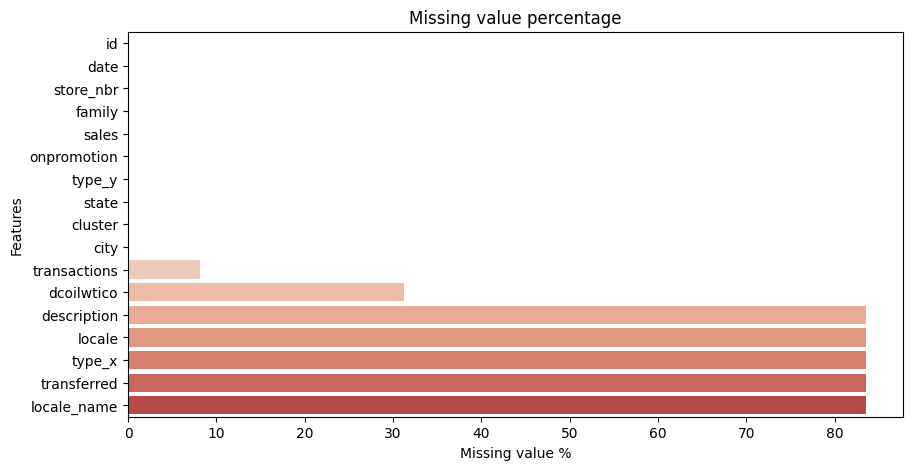

In [17]:
# plot missing data percentage

summary_table.sort_values(by=['null_perct'], ascending=True, inplace=True)

plt.figure(figsize=(10,5))
sns.barplot(y=summary_table['column'], x=summary_table['null_perct'], palette='coolwarm')
plt.title('Missing value percentage')
plt.xlabel('Missing value %')
plt.ylabel('Features')
plt.show()



Except for seven features, there are no missing values. Of these, 'transactions' has less than 10% missing values, 'dcoilwtico' has around 30%, and the rest have more than 80% missing values. The features with more than 80% missing values are related to the holidays table, and it is expected to see those missing values since the table was merged with the training data, and not all days are holidays or have some special events.

In [24]:
train['date'] = pd.to_datetime(train['date'])

In [27]:
train.head()

,id,date,store_nbr,family,sales,onpromotion,type_x,locale,locale_name,description,transferred,dcoilwtico,city,state,type_y,cluster,transactions
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
1,1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
2,2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
3,3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN
4,4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,NaN


#### 4. Data visualization

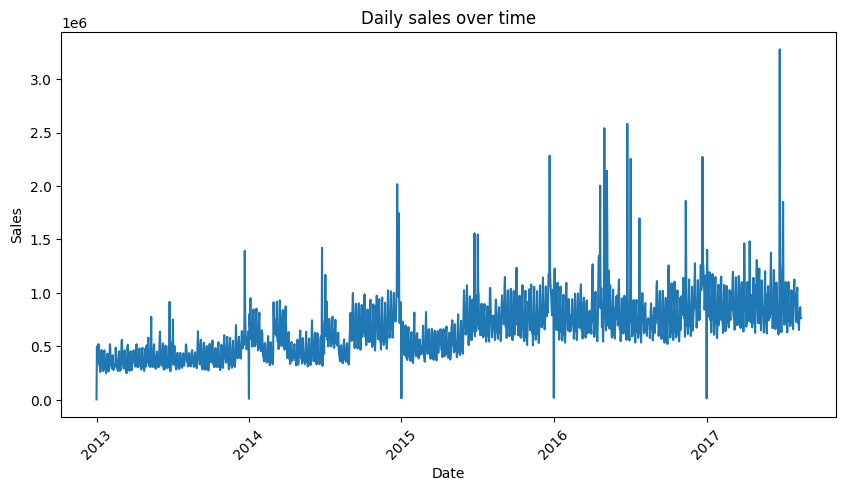

In [31]:
# visualize sales over time

# aggregate sales by date
daily_sales = train.groupby('date')['sales'].sum().reset_index()

#plot
plt.figure(figsize=(10,5))
plt.plot( daily_sales['date'], daily_sales['sales'])

plt.title('Daily sales over time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

There are some significant spikes in the sales between 2016 and 2017. This might be due to the earthquake on April 16, 2016. Let's take a closer look at this perios.

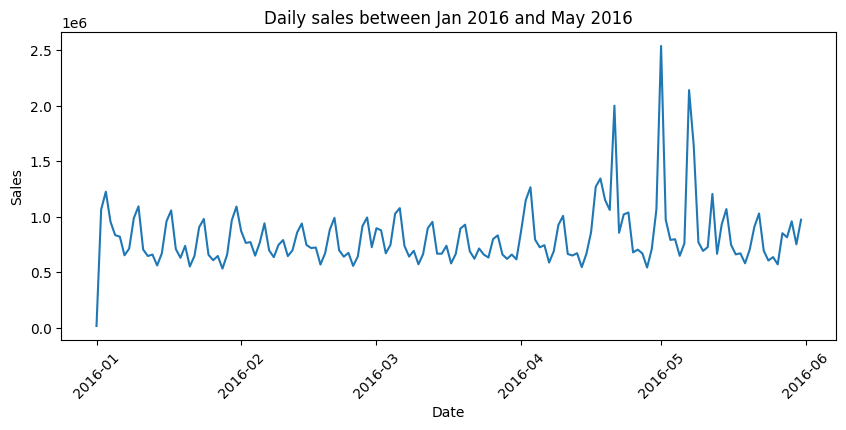

In [46]:
# extract the sales data for 2016
sub = daily_sales[(daily_sales['date']>='2016-01-01') & (daily_sales['date']<='2016-05-31')]

#plot
plt.figure(figsize=(10,4))
plt.plot( sub['date'], sub['sales'])

plt.title('Daily sales between Jan 2016 and May 2016')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

The increase in sales we observe between April 2016 and May 2016 probably corresponds to the earthquake at Ecuador. Additionally, since the wages in the public sector are paid every two weeks on the 15th and on the last day of the month, this can explain the spike in sales on the last day and the first day of the month following the earthquake. 